<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analysis of investing at GPW in 2020*** 

---













#Downloading libraries and creating wig20 table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table

In [2]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [3]:
#Creat a DataFrame with names of WIG 20 one joint stock company
stocks_at_WIG20 = pd.DataFrame(np.array([
    ['WIG20' , 'wig20.pl'],
    ['Alior Bank' , 'alr.pl'],
    ['CCC' , 'ccc.pl'],
    ['CD Projekt' , 'cdr.pl'],
    ['Cyfrowy Polsat SA' , 'cps.pl'],
    ['Dino Polska' , 'dnp.pl'],
    ['Jastrzebska Spolka Weglowa' , 'jsw.pl'],
    ['KGHM Polska Mied' , 'kgh.pl'],
    ['LPP' , 'lpp.pl'],
    ['Grupa Lotos SA' , 'lts.pl'],
    ['mBank' , 'mbk.pl'],
    ['Orange Polska' , 'opl.pl'],
    ['Bank Polka Kasa Opieki' , 'peo.pl'],
    ['PGE Polska Grupa Energetyczna' , 'pge.pl'],
    ['Polskie Gronictwo Naftowe i Gazownictwo' , 'pgn.pl'],
    ['Powszechna Kasa Oszczednosci Bank Polski' , 'pko.pl'],
    ['Play Communications SA' , 'ply.pl'],
    ['Powszechny Zaklad Ubezpieczen' , 'pzu.pl'],
    ['Santander Bank Polska' , 'spl.pl'],
    ['Tauron Polska Energia' , 'tpe.pl']
    ]), columns = ['Full_name','Short_name'])

# Functions

> ## Downloading data

In [4]:
def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Short_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  df.rename(columns = { stock['Short_name'] : 'stooq_data'},inplace = True)
  return df

>## WIG20 Tabel

In [5]:
def WIG20_frame(start_date,end_date):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_at_WIG20)):
    tmp = get_data(stocks_at_WIG20.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

>## Portfolio

In [6]:
def preparing_portfolio(total_investments,stocks):
  
  #Get data to stock
  def get_frame(stock):
    return WIG20_by_stocks.get_group(stock)
  
  stocks_data = map(get_frame,stocks)
  df = pd.concat(stocks_data, keys = stocks, names= ['Stock','Date'])
  df = df.reset_index().pivot(index='Date',columns = 'Stock', values = ['Close','Volume'])
  portfolio_change = (1 + df[['Close']].pct_change()).cumprod().fillna(1).round(2).rename(columns = {'Close' : 'ROI'})
  investment_value = portfolio_change.multiply(total_investments).rename(columns = {'ROI' : 'Investments_value'})
  investment_value['Sum_of_investments'] = investment_value.sum(axis=1)
  portfolio_value = pd.concat([df,portfolio_change,investment_value], axis = 1)
  portfolio_value['ROI_of_investments'] = (1 + portfolio_value[['Sum_of_investments']].pct_change()).cumprod().fillna(1).round(2)
  return portfolio_value

In [55]:
def portfolio_summary(portfolio):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/5)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/5 -2:
      portfolio_list = portfolio_list + ", "

  #Summary
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = portfolio_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1]
  ))
  print("-"*50)
  print("Rate of investment is {ROI} %".format(
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  print("-"*50 + "\n")
  #Graphs
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for k in range(int(len(portfolio_list)/5)):
    plt.plot(portfolio[['Investments_value'][0]][portfolio[['Investments_value'][0]].columns[k]], label = portfolio[['Investments_value'][0]].columns[k])
  plt.grid()
  plt.legend()
  plt.title('Value of investments by stocks')
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  plt.show()

  return

In [8]:
def portfolio_compare(portfolio, benchmark):
  #Stocks list
  tmp = portfolio.columns.to_frame()['Stock'].values
  portfolio_list = ''
  for i in range(int(len(tmp)/5)):
    portfolio_list = portfolio_list + tmp[i]
    if i < len(tmp)/5 -2:
      portfolio_list = portfolio_list + ", "
  
  tmp = benchmark.columns.to_frame()['Stock'].values
  benchmark_list = ''
  for i in range(int(len(tmp)/5)):
    benchmark_list = benchmark_list + tmp[i]
    if i < len(tmp)/5 -2:
      benchmark_list = benchmark_list + ", "
  

  #compare
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = portfolio_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN, Rate of investment is {ROI} %".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1],
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  
     
  print("Ratio investment to benchmark is {change}%".format(
     change = ((portfolio['Sum_of_investments'][-1]/benchmark['Sum_of_investments'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  #graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Sum_of_investments'], color = 'green', label = portfolio_list)
  plt.plot(benchmark['Sum_of_investments'], color = 'red',label = benchmark_list)
  plt.title("Value of investment " + portfolio_list, fontsize = 22, fontweight="bold")
  plt.grid()
  plt.legend()

  return

> ## Basic informaction about data set

In [ ]:
def basic_summary_data(data):

  print("-"*50)
  print('5 first and 5 last record'+ "\n")
  print(df.head())
  print("-"*50)
  print(df.tail())
  print("-"*50+"\n")
  
  print('Summary of dataframe' + "\n")
  print(df.info())
  print("-"*50+"\n")
  
  print('Statistical summary' + "\n")
  print(df.describe())
  print("-"*50)

  return 

>## Change interval

In [ ]:
def change_interval(data):
  
  print("-"*50)
  print("Week's mean" + "\n")
  print(df.resample('W').mean().tail())
  
  print("-"*50+"\n")
  print("Month's last value" + "\n")
  print(df.resample('M').last().tail())
  print("-"*50)
  return 

>## Visualization of stock actions

In [ ]:
def make_graphics(data):
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  plt.plot(data['Close'])
  plt.title('Stocks Value')
  plt.grid()
  #2
  plt.subplot(122)
  plt.plot(data['Volume'])
  plt.title('Volume')
  plt.grid()
  return plt.show()

>## Relative change

In [ ]:
def relative_change(data):
  # Creating new columns with percentage change between the current and a prior element
  data['pct_change'] = data['Close'].pct_change()
  data['log_change'] = np.log(data['Close'].pct_change() + 1)

  # Graphs
  plt.figure(figsize=(28,8))
  #1
  plt.subplot(121)
  plt.plot(data['log_change'])
  #2
  plt.subplot(122)
  plt.hist(data['log_change'], bins = 50)
  
  return plt.show()

# WIG20

In [9]:
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
WIG20_tabel = WIG20_frame(start_date,end_date) #Run onc time because its API

In [10]:
WIG20_tabel

,Open,High,Low,Close,Volume,Stock_name
Date,,,,,,
2020-01-02,2161.550,2200.570,2161.420,2200.100,21369888,WIG20
2020-01-03,2192.310,2192.310,2159.030,2173.970,20627251,WIG20
2020-01-07,2171.720,2176.800,2143.110,2145.010,19556434,WIG20
2020-01-08,2140.290,2140.290,2114.240,2115.990,20739943,WIG20
2020-01-09,2132.020,2157.610,2132.020,2157.610,19887696,WIG20
...,...,...,...,...,...,...
2020-10-09,2.254,2.254,2.052,2.082,8529272,Tauron Polska Energia
2020-10-12,2.096,2.126,2.040,2.062,3668557,Tauron Polska Energia
2020-10-13,2.086,2.092,1.965,1.965,3351472,Tauron Polska Energia


In [11]:
WIG20_by_stocks = WIG20_tabel.groupby('Stock_name') #This is our basic tabel to creating portfolios !!!!!!!!!!!!!!!!!

# Portfolio

In [12]:
WIG20_by_stocks.size()

Stock_name
Alior Bank                                  201
Bank Polka Kasa Opieki                      201
CCC                                         201
CD Projekt                                  201
Cyfrowy Polsat SA                           201
Dino Polska                                 201
Grupa Lotos SA                              201
Jastrzebska Spolka Weglowa                  201
KGHM Polska Mied                            201
LPP                                         201
Orange Polska                               201
PGE Polska Grupa Energetyczna               201
Play Communications SA                      201
Polskie Gronictwo Naftowe i Gazownictwo     201
Powszechna Kasa Oszczednosci Bank Polski    201
Powszechny Zaklad Ubezpieczen               201
Santander Bank Polska                       201
Tauron Polska Energia                       201
WIG20                                       201
mBank                                       201
dtype: int64

In [109]:
#Our Investment
investment = pd.DataFrame(np.array(
    [['Alior Bank',1000],
    ['LPP', 2500],
    ['CD Projekt', 1000]]), columns = ['Stock','Value']).sort_values('Stock')
investment['Value'] = investment['Value'].astype('float')
sum_investment = investment['Value'].sum()
benchmark = ['WIG20']
benchmark_portfolio = preparing_portfolio(sum_investment, benchmark)
my_portfolio = preparing_portfolio(investment['Value'].values,investment['Stock'])

In [110]:
my_portfolio

Close             ... Sum_of_investments ROI_of_investments
Stock      Alior Bank CD Projekt  ...                                      
Date                              ...                                      
2020-01-02     29.900      286.8  ...             4500.0               1.00
2020-01-03     29.100      286.0  ...             4470.0               0.99
2020-01-07     28.520      283.8  ...             4415.0               0.98
2020-01-08     27.960      281.1  ...             4370.0               0.97
2020-01-09     28.260      288.6  ...             4410.0               0.98
...               ...        ...  ...                ...                ...
2020-10-09     14.190      378.2  ...             3665.0               0.81
2020-10-12     14.415      371.0  ...             3645.0               0.81
2020-10-13     13.930      383.0  ...             3660.0               0.81
2020-10-14     13.865      389.0  ...             3695.0               0.82
2020-10-15     12.840      375.0  ...             3440.0               0.76

[201 rows x 14 columns]

--------------------------------------------------
At 2020-01-02 We invested 625000.0 PLN at CD Projekt, LPP
--------------------------------------------------
On 2020-10-15 is worth 618750.0 PLN
--------------------------------------------------
Rate of investment is -1.0 %
--------------------------------------------------



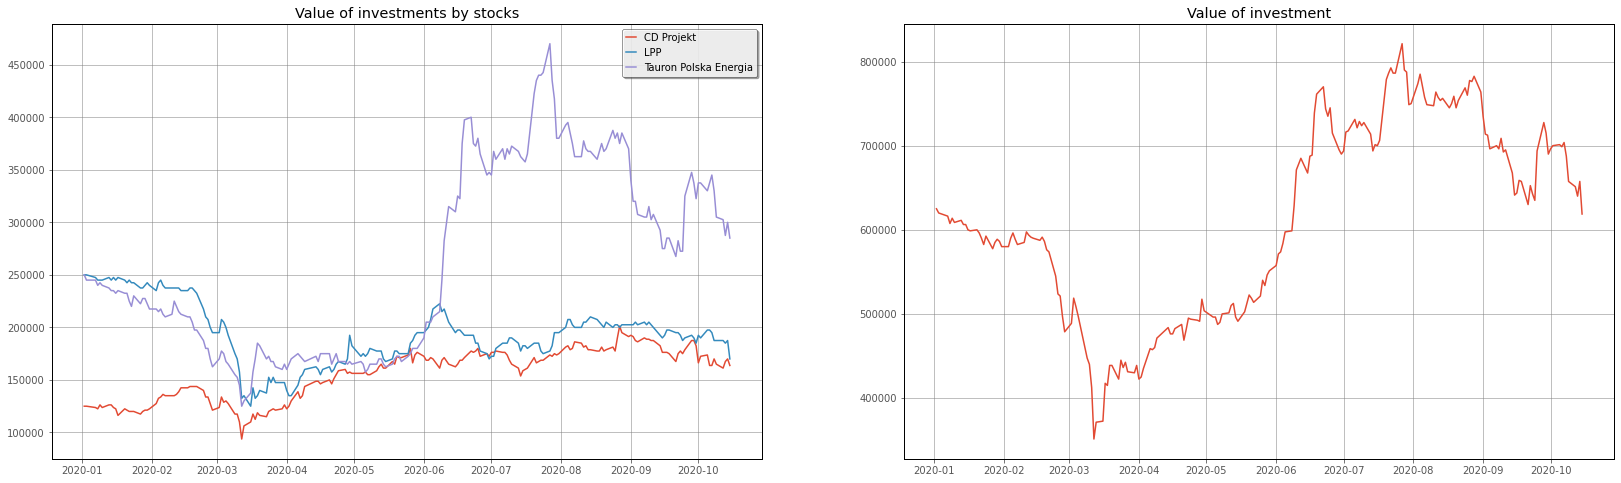

In [56]:
portfolio_summary(my_portfolio)

In [ ]:
my_portfolio.head()

,Close,Volume,ROI,Investments_value,Sum_of_investments,ROI_of_investments
Stock,CCC,CCC,CCC,CCC,,
Date,,,,,,
2020-01-02,115.9,155242.0,1.00,500.0,500.0,1.00
2020-01-03,114.0,92002.0,0.98,490.0,490.0,0.98
2020-01-07,113.4,100034.0,0.98,490.0,490.0,0.98
2020-01-08,111.4,81951.0,0.96,480.0,480.0,0.96
2020-01-09,101.3,819686.0,0.87,435.0,435.0,0.87


In [ ]:
benchmark_portfolio.head()

,Close,Volume,ROI,Investments_value,Sum_of_investments,ROI_of_investments
Stock,WIG20,WIG20,WIG20,WIG20,,
Date,,,,,,
2020-01-02,2200.10,21369888.0,1.00,500.0,500.0,1.00
2020-01-03,2173.97,20627251.0,0.99,495.0,495.0,0.99
2020-01-07,2145.01,19556434.0,0.97,485.0,485.0,0.97
2020-01-08,2115.99,20739943.0,0.96,480.0,480.0,0.96
2020-01-09,2157.61,19887696.0,0.98,490.0,490.0,0.98


--------------------------------------------------
At 2020-01-02 We invested 500.0 PLN at CCC
--------------------------------------------------
On 2020-10-15 is worth 190.0 PLN, Rate of investment is -62.0 %
Ratio investment to benchmark is -48.65%
--------------------------------------------------



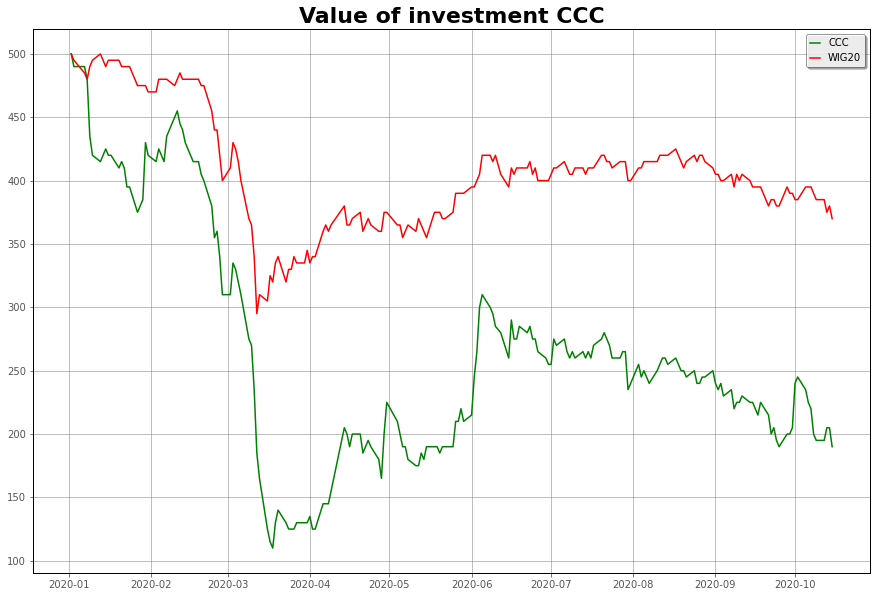

In [ ]:
portfolio_compare(my_portfolio,benchmark_portfolio)